# Two qubit operations

In [2]:
from qiskit import (QuantumCircuit,
                        QuantumRegister,
                        ClassicalRegister,
                        execute,
                        Aer)
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [9]:
from qiskit import transpile
qc = QuantumCircuit(1)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
print(qc)
new_qc = transpile(qc, basis_gates=["cx", "u3"])
print(new_qc)

     ┌─────────────────────────────┐
q_0: ┤ initialize(0.70711,0.70711) ├
     └─────────────────────────────┘


In [8]:
backend = Aer.get_backend("statevector_simulator")
def show_result(qc):
    job = execute(qc, backend = Aer.get_backend("statevector_simulator"))
    vec = job.result().get_statevector(qc)
    
    bins = [format(i, '0%db'%np.ceil(np.log2(len(vec)))) for i, _ in enumerate(vec)]
    for i, j in zip(vec, bins):
        print(i, ": |%s>"%str(j))

### Q1. Create state 
$$|\psi_0\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

In [12]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
#  here create circuit
qc.h(0)
qc.cx(0,1)
show_result(qc)

(0.7071067811865476+0j) : |00>
0j : |01>
0j : |10>
(0.7071067811865475+0j) : |11>


### Q2. Create state 
$$|\psi_0\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$$

In [13]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
#  here create circuit
qc.h(0)
qc.x(1)
qc.cx(0,1)
show_result(qc)

0j : |00>
(0.7071067811865475+0j) : |01>
(0.7071067811865476+0j) : |10>
0j : |11>


### Q3. Validate CHSH inequality (A little bit advanced)
What is CHSH inequality? https://en.wikipedia.org/wiki/CHSH_inequality  
Briefly, CHSH inequality is a proof of bell's theorem.   
Usually, CHSH inequality satisfies
$$|\langle{A, B}\rangle-\langle{a, B}\rangle+\langle{A, b}\rangle + \langle{a, b}\rangle| \leq 2$$  
in a classical system. However, in a quantum system, this inequality satisfies
$$2 < |\langle{A, B}\rangle-\langle{a, B}\rangle+\langle{A, b}\rangle + \langle{a, b}\rangle|\leq2\sqrt{2}$$  
A, B, a, b represent the basis of measurement.

#### First step (prepare quantum circuit)
We need two qubits to simulate CHSH inequality.

In [15]:
c = ClassicalRegister(2)
q = QuantumRegister(2)
qc = QuantumCircuit(q,c)

#### Second step (prepare bell state)
Bell state is one of the most important quantum states. There are four types of bell states.
$$|\psi^{+}\rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$
$$|\psi^{-}\rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}$$
$$|\phi^{+}\rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$
$$|\phi^{-}\rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}$$
Choose one of them and prepare it on the circuit.

In [15]:
#|𝜓+⟩
qc.h(0)
qc.cx(0,1)
show_result(qc)

(0.7071067811865476+0j) : |00>
0j : |01>
0j : |10>
(0.7071067811865475+0j) : |11>


In [10]:
#|𝜓−⟩
qc.x(0)
qc.h(0)
qc.cx(0,1)
show_result(qc)

(0.7071067811865475-8.659560562354932e-17j) : |00>
0j : |01>
0j : |10>
(-0.7071067811865476+8.659560562354934e-17j) : |11>


In [12]:
#|𝜙+⟩
qc.x(0)
qc.h(1)
qc.cx(1,0)
show_result(qc)

0j : |00>
(0.7071067811865476+0j) : |01>
(0.7071067811865475+0j) : |10>
0j : |11>


In [16]:
#|𝜙−⟩
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(1,0)
show_result(qc)

0j : |00>
(0.7071067811865475-8.659560562354932e-17j) : |01>
(-0.7071067811865476+8.659560562354934e-17j) : |10>
0j : |11>


#### Third step (Measurement basis)
Prepare four measurement basis.  
A = Z  
a = X  
B = $\frac{Z+X}{\sqrt{2}}$  
b = $\frac{Z-X}{\sqrt{2}}$  
In the qiskit, measurement basis is Z if you don't apply any operations.
To change the measurement basis, you need to apply operations before measurement.  
Hint: This is the basis of B
![Bbasis](./image/Bbasis.png)
You have to calculate one state with four basis.
Fill this table.

|Basis\Outcome|$P(|00\rangle)$       | $P(|01\rangle)$      | $P(|10\rangle)$      | $P(|11\rangle)$       |
|-------------|----------------------|----------------------|----------------------| ----------------------|
| AB          |        0.5           |              0       |           0.25       |           0.25        |
| aB          |          0           |            0.5       |            0.5       |           0           |
| Ab          |       0.75           |              0       |              0       |           0.25        |
| ab          |          0           |            0.5       |            0.5       |           0           |

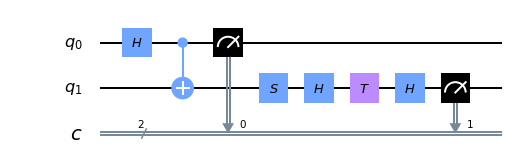

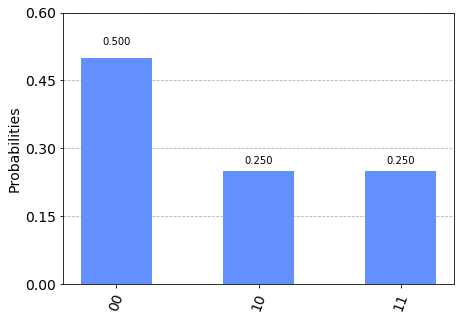

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#AB
qc.measure(0,0)
qc.s(1)
qc.h(1)
qc.t(1)
qc.h(1)
qc.measure(1,1)
display(qc.draw(output = 'mpl'))
backend = Aer.get_backend("statevector_simulator")
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

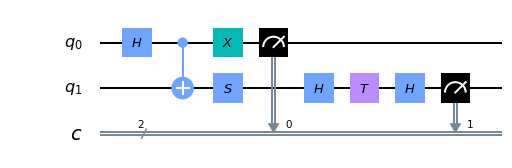

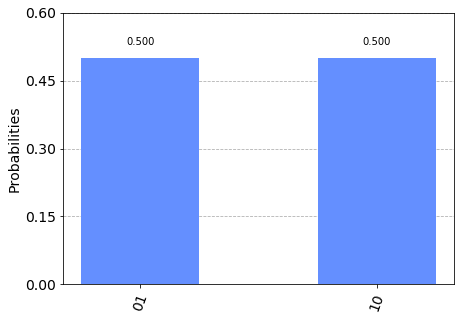

In [3]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#aB
qc.x(0)
qc.measure(0,0)
qc.s(1)
qc.h(1)
qc.t(1)
qc.h(1)
qc.measure(1,1)
display(qc.draw(output = 'mpl'))
backend = Aer.get_backend("statevector_simulator")
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

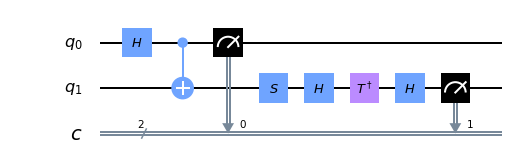

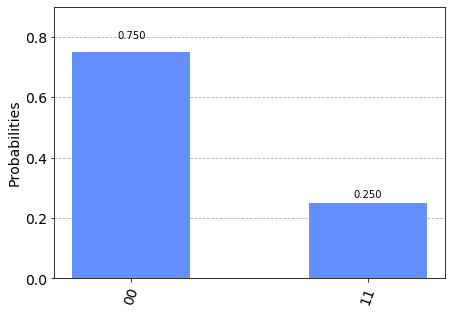

In [4]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#Ab
qc.measure(0,0)
qc.s(1)
qc.h(1)
qc.tdg(1)
qc.h(1)
qc.measure(1,1)
display(qc.draw(output = 'mpl'))
backend = Aer.get_backend("statevector_simulator")
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

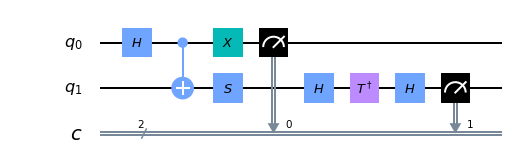

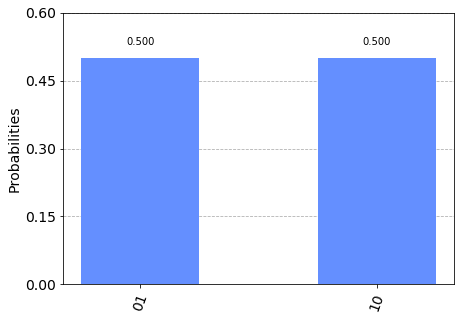

In [5]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#ab
qc.x(0)
qc.measure(0,0)
qc.s(1)
qc.h(1)
qc.tdg(1)
qc.h(1)
qc.measure(1,1)
display(qc.draw(output = 'mpl'))
backend = Aer.get_backend("statevector_simulator")
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

#### Final step (Calculate S value)
Finally, we need to calculate S value.
If you chose $|\psi^+\rangle$ or  $|\psi^-\rangle$, calculate $$\langle{MN}\rangle =  P(|00\rangle)+P(|11\rangle)-P(|01\rangle)-P(|10\rangle)$$   
else you chose $|\phi^+\rangle$ or $|\phi^+\rangle$, then you need to  
$$\langle{MN}\rangle = P(|01\rangle)+P(|10\rangle)-P(|00\rangle)-P(|11\rangle)$$
for each of basis.
And $$S = |\langle{AB}\rangle-\langle{aB}\rangle+\langle{Ab}\rangle+\langle{ab}\rangle|$$

In [17]:
#    P(|00>) +  P(|11>) - P(|01>) -   P(|10>)
AB = 0.5     +  0.25    - 0.      -   0.25
aB = 0       +  0       - 0.5     -   0.50
Ab = 0.75    +  0.25    - 0       -   0
ab = 0       +  0       - 0.5     -   0.5
S = abs(AB - Ab + aB + ab)
print(S)

2.5
